In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv('dermatology_csv.csv')
data


X = data.iloc[:,:34]
y = data.iloc[:,-1]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy ='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X = pd.DataFrame(X)


In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
regressor = DecisionTreeClassifier()

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 4)

In [6]:
regressor.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
y_predict = regressor.predict(X_test)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        32
           2       0.84      0.91      0.87        23
           3       1.00      1.00      1.00        19
           4       0.77      0.77      0.77        13
           5       1.00      1.00      1.00        17
           6       1.00      0.50      0.67         6

    accuracy                           0.93       110
   macro avg       0.93      0.86      0.88       110
weighted avg       0.93      0.93      0.92       110



In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[32,  0,  0,  0,  0,  0],
       [ 1, 21,  0,  1,  0,  0],
       [ 0,  0, 19,  0,  0,  0],
       [ 0,  3,  0, 10,  0,  0],
       [ 0,  0,  0,  0, 17,  0],
       [ 0,  1,  0,  2,  0,  3]])

Text(69.0, 0.5, 'Truth')

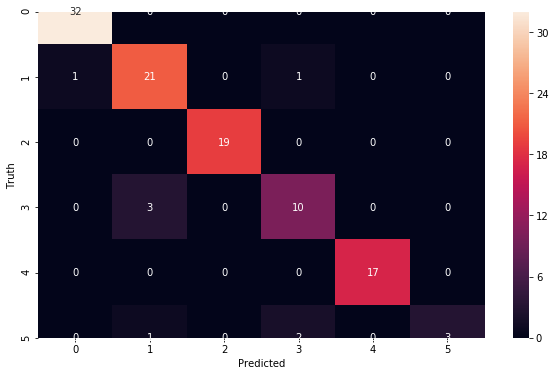

In [10]:
import seaborn as sn
plt.figure(figsize = (10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')